In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fruits_df = pd.read_table('./dataset/fruit_data_with_colors.txt')
fruits_df.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fruit_name', ylabel='count'>

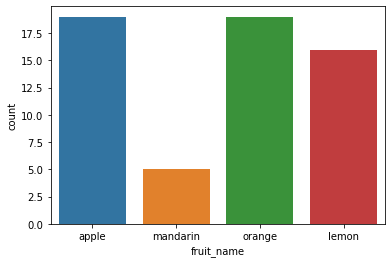

In [5]:
sns.countplot(fruits_df['fruit_name'], label='Count')

In [8]:
# 数据处理
fruits_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
print(fruits_name_dict)

In [11]:
X = fruits_df[['mass','width','height','color_score']]
y = fruits_df['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=1/4, random_state=0)

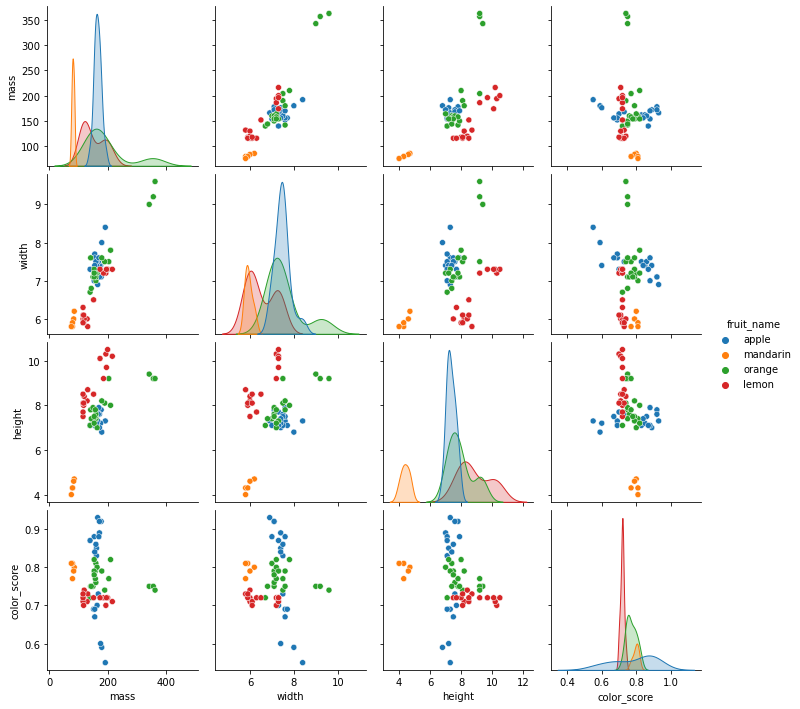

In [9]:
sns.pairplot(data=fruits_df, hue='fruit_name', vars=['mass','width','height','color_score'])

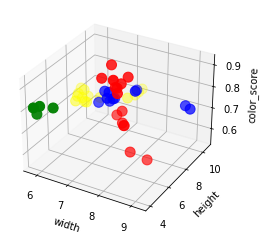

In [15]:
from mpl_toolkits.mplot3d import Axes3D

label_color_dict = {1:'red',2:'green', 3:'blue',4:'yellow'}
colors = list(map(lambda label:label_color_dict[label], Y_train))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'], c=colors, marker='o',s=100 )
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [19]:
#建立训练模型
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)
print("预测值",y_pred)
print("真实值", Y_test.values)

预测值 [3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]
真实值 [3 3 4 3 1 1 3 4 3 1 2 1 3 3 3]


In [23]:
from sklearn.metrics import  accuracy_score
acc = accuracy_score(Y_test,y_pred)
print('准确率:', acc)

准确率: 0.5333333333333333


([<matplotlib.axis.XTick at 0x7fee77f653d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

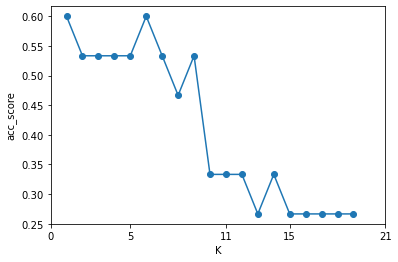

In [34]:
#查看K值对结果的影响
k_range = range(1,20)
acc_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    acc_score.append(knn.score(X_test,Y_test))

plt.figure()
plt.xlabel('K')
plt.ylabel('acc_score')
plt.plot(k_range, acc_score,marker='o')
plt.xticks([0,5,11,15,21])